In [1]:
from timuscle.dataio import loadHDF5asdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from dispest import calc_kasai

In [2]:
data = loadHDF5asdict("output.h5")
lat = data['lat']
axial = data['axial']

ex_axlat = 1E3*np.array([lat[0], lat[-1], axial[-1], axial[0]])

In [3]:
data['bmodes'].shape

(89, 3, 267, 201)

In [4]:
IQ = hilbert(np.mean(data['bmodes'], axis=1), axis=1)
I = IQ.real
Q = IQ.imag

In [5]:
I.shape

(89, 267, 201)

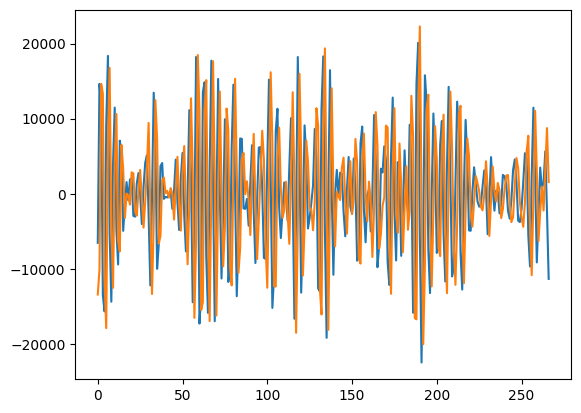

In [6]:
plt.figure()
plt.plot(I[0,:,100])
plt.plot(Q[0,:,100])
plt.show()

In [7]:
vel = calc_kasai(I, Q, taxis=0, fd=5.2E6, ksize=24, kaxis=1, mode='differential')/0.3

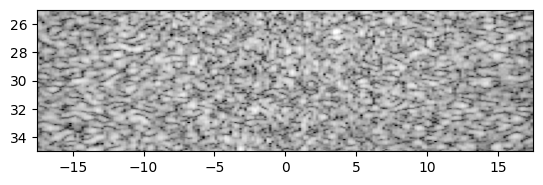

In [8]:
env = np.abs(np.mean(I[0:1,:,:] + 1j*Q[0:1,:,:], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

In [9]:
from dispest import demod_tensor

In [10]:
IQdemod, ifmin, ifmax, fseff = demod_tensor(I, fs = 5.2E6*4, fmin=1E6, fmax=8E6, taxis=1)

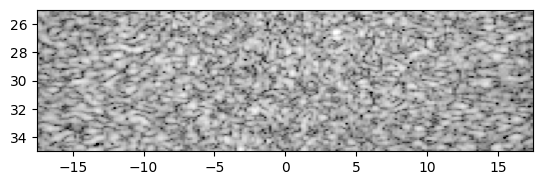

In [11]:
IQdemod.shape

env = np.abs(np.mean(IQdemod[0:1], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

In [12]:
demodquick = np.fft.ifft(np.fft.ifftshift(np.fft.rfft(I, axis=1), axes=1), axis=1)

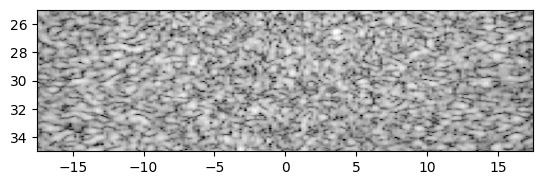

In [13]:
env = np.abs(np.mean(demodquick[0:1], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

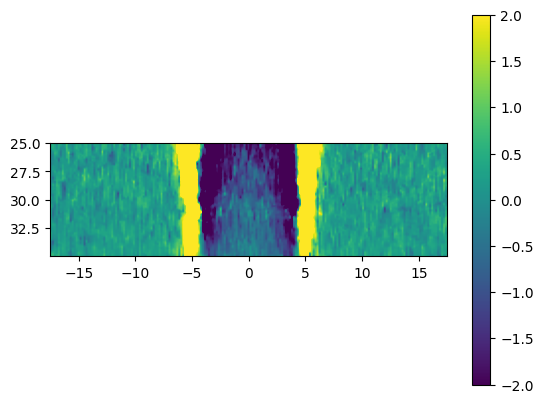

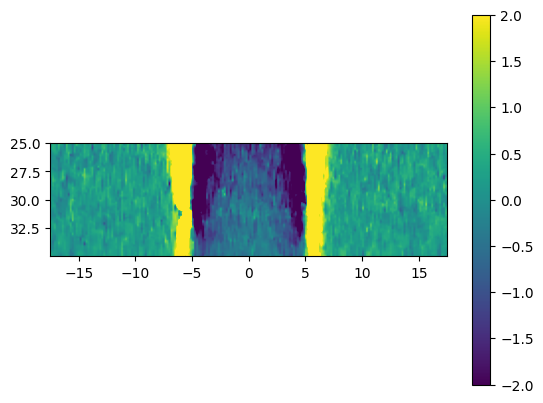

In [14]:
plt.figure()
plt.imshow(vel[10], extent=ex_axlat, vmin=-2, vmax=2)
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(vel[11], extent=ex_axlat, vmin=-2, vmax=2)
plt.colorbar()
plt.show()

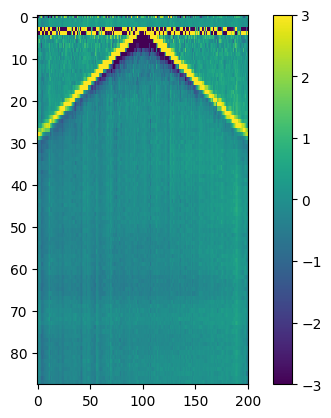

In [15]:
plt.figure()
plt.imshow(vel[:, vel.shape[1]//2], vmin=-3, vmax=3, aspect=4, interpolation='none')
plt.colorbar()
plt.show()

In [16]:
IQ = np.mean(data['demod'], axis=1)
I = IQ.real
Q = IQ.imag

In [17]:
vel = calc_kasai(I, Q, taxis=0, fd=5.2E6, ksize=12, kaxis=1, mode='differential')/0.3

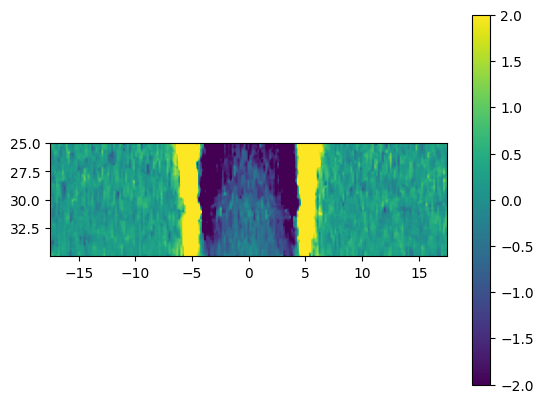

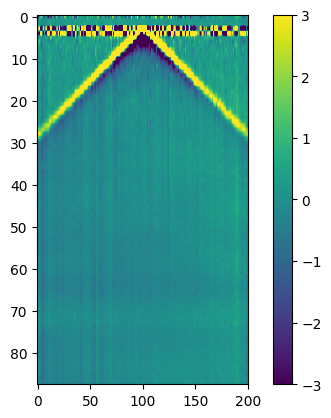

In [18]:
plt.figure()
plt.imshow(vel[10], extent=ex_axlat, vmin=-2, vmax=2)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(vel[:, vel.shape[1]//2], vmin=-3, vmax=3, aspect=4)
plt.colorbar()
plt.show()